# Домашнее задание 1

## Основы ML: EDA, модели, метрики, гипотезы

#### Датасет: Rain in Australia

- Бинарная классификация
- RainTomorrow - целевая переменная для прогнозирования. Отвечает на вопрос: пойдет ли дождь на следующий день? Отмечено как "Да", если в тот день выпало 1 мм и более
- содержит 21 признак

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузка данных

In [2]:
df = pd.read_csv("C:/Users/Alexandra/Jupyter/ML/Задания/Дз 1/weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
df.describe().round(2)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.00,144199.00,142199.00,82670.00,75625.00,135197.00,143693.00,142398.00,142806.00,140953.00,130395.00,130432.00,89572.00,86102.00,143693.00,141851.00
mean,12.19,23.22,2.36,5.47,7.61,40.04,14.04,18.66,68.88,51.54,1017.65,1015.26,4.45,4.51,16.99,21.68
std,6.40,7.12,8.48,4.19,3.79,13.61,8.92,8.81,19.03,20.80,7.11,7.04,2.89,2.72,6.49,6.94
min,-8.50,-4.80,0.00,0.00,0.00,6.00,0.00,0.00,0.00,0.00,980.50,977.10,0.00,0.00,-7.20,-5.40
25%,7.60,17.90,0.00,2.60,4.80,31.00,7.00,13.00,57.00,37.00,1012.90,1010.40,1.00,2.00,12.30,16.60
50%,12.00,22.60,0.00,4.80,8.40,39.00,13.00,19.00,70.00,52.00,1017.60,1015.20,5.00,5.00,16.70,21.10
75%,16.90,28.20,0.80,7.40,10.60,48.00,19.00,24.00,83.00,66.00,1022.40,1020.00,7.00,7.00,21.60,26.40
max,33.90,48.10,371.00,145.00,14.50,135.00,130.00,87.00,100.00,100.00,1041.00,1039.60,9.00,9.00,40.20,46.70


In [6]:
df["Location"].value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [7]:
df.isna()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145456,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145457,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,True,True,False,False,False,False
145458,False,False,False,False,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df["RainTomorrow"].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

### 2. Формулирование гипотез

1) Датасет содержит столбцы с очень большим количеством пропусков (Evaporation, Sunshine), если их убрать, то это не сильно ухудшит качество модели.
2) Признаки, связанные с влажностью, атмосферным давлением, облачностью и средней скоростью ветра (Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, WindSpeed9am, WindSpeed3pm) сильнее всего влияют на то, будет дождь или нет.
3) Если удалить строки с пустыми значениями, то это ухудщит модель, чем если заменить значения медианными.
4) Столбцы с некоторыми признаками по часам - мультиколлинеарны, несут почти одну и ту же информацию, но создают избыточность. Если их объединить, то это не повлияет на результат.
5) Accuracy будет вводить в заблуждение из-за дисбаланса классов. F1 метрика будет более объективна.
6) Location - категориальный признак, он важен для предсказания, но One-hot encoding создаст слишком много признаков, что ухудшит обучение. Необходимо использовать кодирование частотностью.

### 3. Проверка гипотез

#### Общая информация

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [10]:
data_corr = df
data_corr = data_corr.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis = 1)

In [11]:
data_corr['RainTomorrow'].isnull().mean() * 100

np.float64(2.245978275814657)

In [12]:
data_corr['RainToday'] = data_corr['RainToday'].map({'No': 0, 'Yes': 1})
data_corr['RainTomorrow'] = data_corr['RainTomorrow'].map({'No': 0, 'Yes': 1})
data_corr['RainTomorrow'].isnull().mean() * 100

np.float64(2.245978275814657)

#### Посмотрим корреляцию с пустыми значениями

<Axes: >

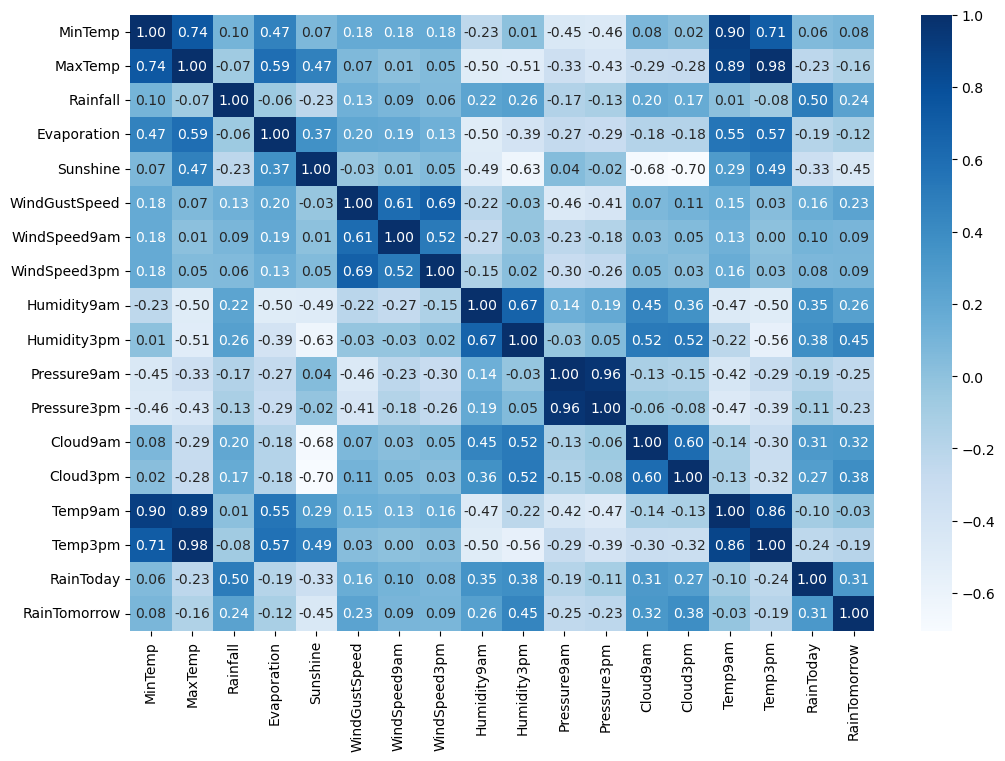

In [13]:
plt.figure(figsize = (12, 8))
sns.heatmap(data_corr.corr(), annot=True, fmt='.2f', cmap='Blues')

#### Заменим пустые значения медианными, сделаем корреляцию и сравним

In [14]:
data_corr.isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [15]:
data_corr_median = data_corr
numeric_cols = data_corr_median.select_dtypes(include=[np.number]).columns.tolist()
data_corr_median[numeric_cols] = data_corr_median[numeric_cols].fillna(data_corr_median[numeric_cols].median())
data_corr_median.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

<Axes: >

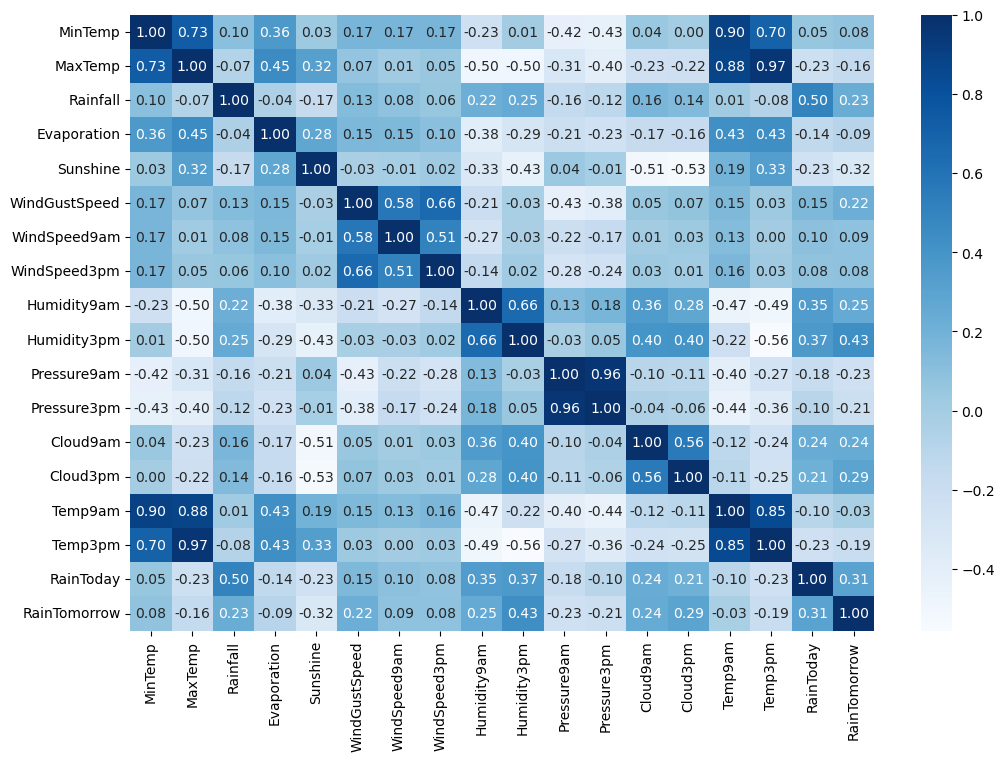

In [16]:
plt.figure(figsize = (12, 8))
sns.heatmap(data_corr_median.corr(), annot=True, fmt='.2f', cmap='Blues')

При сравнении двух матриц корреляции не было выявлено сильных изменений, вследствие чего можно сделать вывод, что пустые значения можно заменить медианными.

#### Гипотеза 4

<Axes: >

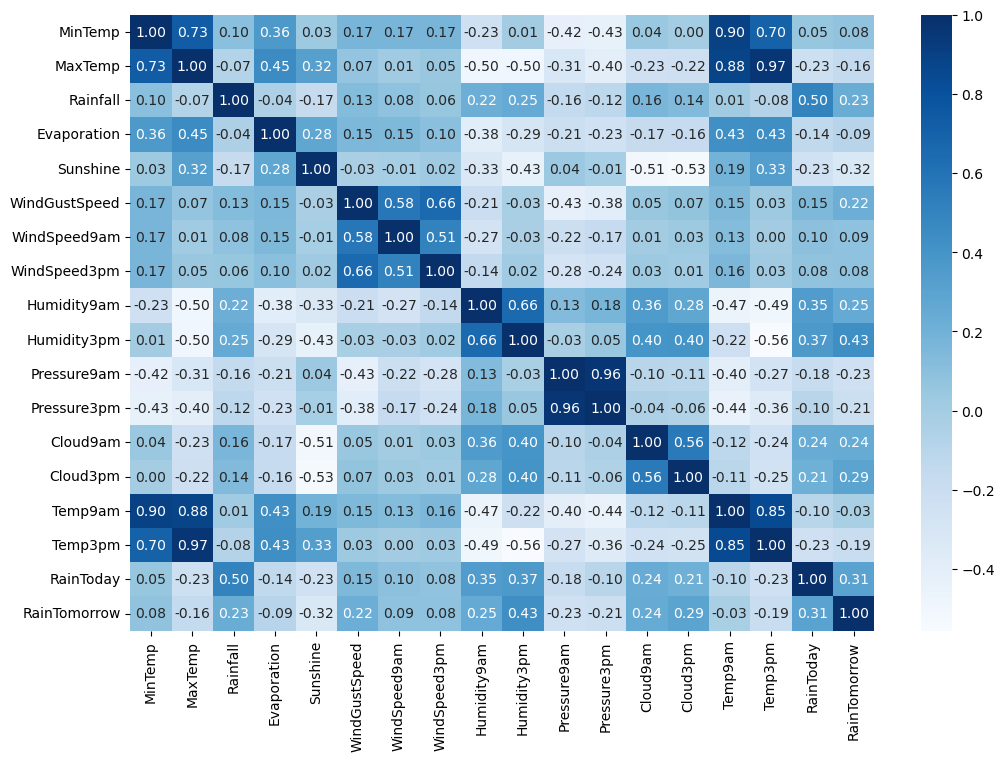

In [17]:
data_corr = data_corr_median
plt.figure(figsize = (12, 8))
sns.heatmap(data_corr.corr(), annot=True, fmt='.2f', cmap='Blues')

In [18]:
data_corr['Temp_diff'] = abs(data_corr['Temp3pm'] - data_corr['Temp9am'])
print(f'Средняя разница температур утром и вечером: {data_corr['Temp_diff'].mean():.1f}')

data_corr['Humidity_diff'] = abs(data_corr['Humidity3pm'] - data_corr['Humidity9am'])
print(f'Средняя разница влажности: {data_corr["Humidity_diff"].mean():.1f}')

data_corr['Pressure_diff'] = abs(data_corr['Pressure3pm'] - data_corr['Pressure9am'])
print(f'Средняя разница давления: {data_corr["Pressure_diff"].mean():.1f}')

data_corr['Cloud_diff'] = abs(data_corr['Cloud3pm'] - data_corr['Cloud9am'])
print(f'Средняя разница облачности: {data_corr["Cloud_diff"].mean():.1f}')

data_corr['WindSpeed_diff'] = abs(data_corr['WindSpeed3pm'] - data_corr['WindSpeed9am'])
print(f'Средняя разница скорости ветра: {data_corr["WindSpeed_diff"].mean():.1f}')

Средняя разница температур утром и вечером: 5.0
Средняя разница влажности: 19.6
Средняя разница давления: 2.7
Средняя разница облачности: 1.2
Средняя разница скорости ветра: 7.7


Гипотеза 4 - Столбцы с некоторыми признаками по часам - мультиколлинеарны, несут почти одну и ту же информацию, но создают избыточность. Если их объединить, то это не повлияет на результат.
На матрице кореляции наблюдается не сильная разница по часам в признаках, их содержащих, значит, их объединение не повлиет на результат. Гипотеза 4 подтверждена

In [19]:
data_corr['Temp_avg'] = (data_corr['Temp3pm']+data_corr['Temp9am'])/2
data_corr['Humidity_avg'] = (data_corr['Humidity3pm']+data_corr['Humidity9am'])/2
data_corr['Pressure_avg'] = (data_corr['Pressure3pm']+data_corr['Pressure9am'])/2
data_corr['Cloud_avg'] = (data_corr['Cloud3pm'] + data_corr['Cloud9am'])/2
data_corr['WindSpeed_avg'] = (data_corr['WindSpeed3pm'] + data_corr['WindSpeed9am'])/2

data_corr = data_corr.drop(['Temp3pm', 'Temp9am', 'Humidity3pm', 'Humidity9am', 'Pressure3pm', 'Pressure9am', 'Cloud3pm', 'Cloud9am','WindSpeed3pm', 'WindSpeed9am'], axis = 1)
data_corr = data_corr.drop(['Temp_diff', 'Humidity_diff', 'Pressure_diff', 'Cloud_diff', 'WindSpeed_diff'], axis = 1)
data_corr.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainTomorrow,Temp_avg,Humidity_avg,Pressure_avg,Cloud_avg,WindSpeed_avg
0,13.4,22.9,0.6,4.8,8.4,44.0,0.0,0.0,19.35,46.5,1007.40,6.5,22.0
1,7.4,25.1,0.0,4.8,8.4,44.0,0.0,0.0,20.75,34.5,1009.20,5.0,13.0
2,12.9,25.7,0.0,4.8,8.4,46.0,0.0,0.0,22.10,34.0,1008.15,3.5,22.5
3,9.2,28.0,0.0,4.8,8.4,24.0,0.0,0.0,22.30,30.5,1015.20,5.0,10.0
4,17.5,32.3,1.0,4.8,8.4,41.0,0.0,0.0,23.75,57.5,1008.40,7.5,13.5


#### Гипотеза 2

<Axes: >

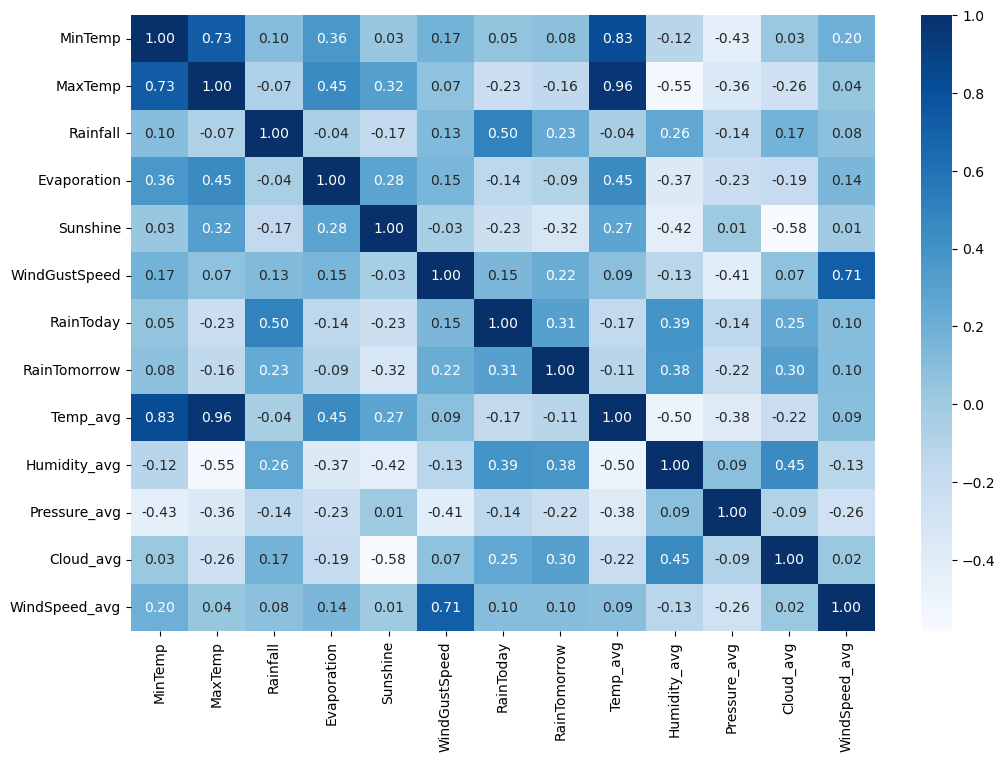

In [20]:
plt.figure(figsize = (12, 8))
sns.heatmap(data_corr.corr(), annot=True, fmt='.2f', cmap='Blues')

Гипотеза 2 - Признаки, связанные с влажностью, атмосферным давлением, облачностью и средней скоростью ветра (Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Cloud9am, Cloud3pm, WindSpeed9am, WindSpeed3pm) сильнее всего влияют на то, будет дождь или нет.

На матрице корреляций мы можем наблюдать, что наибольшее влияние на дождь (как в случае RainToday, так и в случае RainTomorrow) имеют признаки: Rainfall, Humidity (корреляция хоть и слабая, но имеется). Низкую линейную корреляцию имеют признаки MinTemp, MaxTemp, Evaporation, WindGustSpeed, Temp_avg, Pressure_avg.

На данный момент гипотеза частично подтверждена, необходима проверка

In [21]:
data = pd.concat([
    df[['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']],
    data_corr
], axis = 1)

Закодируем категориальные признаки - Location и WindDir


In [23]:
data['WindDir_change'] = (data['WindDir9am'] != data['WindDir3pm'])
print(f'Ветер меняет направление в {data["WindDir_change"].mean()*100:.1f}% дней')

Ветер меняет направление в 83.7% дней


In [24]:
data['WindDir'] = data['WindDir3pm']
data.drop(['WindDir9am', 'WindDir3pm', 'WindDir_change'], axis = 1)

,Date,Location,WindGustDir,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainToday,RainTomorrow,Temp_avg,Humidity_avg,Pressure_avg,Cloud_avg,WindSpeed_avg,WindDir
0,2008-12-01,Albury,W,13.4,22.9,0.6,4.8,8.4,44.0,0.0,0.0,19.35,46.5,1007.40,6.5,22.0,WNW
1,2008-12-02,Albury,WNW,7.4,25.1,0.0,4.8,8.4,44.0,0.0,0.0,20.75,34.5,1009.20,5.0,13.0,WSW
2,2008-12-03,Albury,WSW,12.9,25.7,0.0,4.8,8.4,46.0,0.0,0.0,22.10,34.0,1008.15,3.5,22.5,WSW
3,2008-12-04,Albury,NE,9.2,28.0,0.0,4.8,8.4,24.0,0.0,0.0,22.30,30.5,1015.20,5.0,10.0,E
4,2008-12-05,Albury,W,17.5,32.3,1.0,4.8,8.4,41.0,0.0,0.0,23.75,57.5,1008.40,7.5,13.5,NW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,E,2.8,23.4,0.0,4.8,8.4,31.0,0.0,0.0,16.25,37.5,1022.45,5.0,12.0,ENE
145456,2017-06-22,Uluru,NNW,3.6,25.3,0.0,4.8,8.4,22.0,0.0,0.0,17.70,38.5,1021.30,5.0,11.0,N
145457,2017-06-23,Uluru,N,5.4,26.9,0.0,4.8,8.4,37.0,0.0,0.0,19.30,38.5,1018.90,5.0,9.0,WNW
145458,2017-06-24,Uluru,SE,7.8,27.0,0.0,4.8,8.4,28.0,0.0,0.0,20.55,37.5,1017.95,2.5,10.0,N


In [25]:
df_corr_with_cat = data_corr
df_corr_with_cat['Location_code'] = data['Location'].astype('category').cat.codes
df_corr_with_cat['WindDir_code'] = data['WindDir'].astype('category').cat.codes

In [26]:
corr_with_target = df_corr_with_cat.corr()['RainTomorrow'].sort_values(ascending=False)

In [27]:
corr_with_target

RainTomorrow     1.000000
Humidity_avg     0.379827
RainToday        0.305744
Cloud_avg        0.301452
Rainfall         0.233877
WindGustSpeed    0.220144
WindSpeed_avg    0.098313
MinTemp          0.082249
WindDir_code     0.023098
Location_code   -0.005498
Evaporation     -0.088709
Temp_avg        -0.113517
MaxTemp         -0.156523
Pressure_avg    -0.223765
Sunshine        -0.319412
Name: RainTomorrow, dtype: float64

Наибольшую корреляцию с RainTomorrow имеют Humidity_avg, RainToday, Cloud_avg, Rainfall, WindGustSpeed. Pressure_avg имеет отрицательную.
Влажность, давление и облачность - самые важные признаки.Скорость ветра - не подтвердилость влияние. Гипотеза 2 подтверждается частично.

In [36]:
data = data.drop(['WindDir_change', 'WindDir'], axis = 1)

#### Гипотеза 1

In [37]:
corr_with_target

RainTomorrow     1.000000
Humidity_avg     0.379827
RainToday        0.305744
Cloud_avg        0.301452
Rainfall         0.233877
WindGustSpeed    0.220144
WindSpeed_avg    0.098313
MinTemp          0.082249
WindDir_code     0.023098
Location_code   -0.005498
Evaporation     -0.088709
Temp_avg        -0.113517
MaxTemp         -0.156523
Pressure_avg    -0.223765
Sunshine        -0.319412
Name: RainTomorrow, dtype: float64

Корреляция Evaporation с RainTomorrow - очень слабая, можно удалить.
Корреляция Sunshine с RainTomorrow - сильная отрицательная, удалять нельзя.
Гипотеза 1 частично верна.

In [39]:
data = data.drop('Evaporation', axis = 1)

#### Гипотеза 3

Формулировка: Если удалить строки с пустыми значениями, то это ухудщит модель, чем если заменить значения медианными.

In [45]:
def preprocess_data(df_raw, handle_missing='median'):
    df = df_raw.copy()

    df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})
    df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})

    df['Temp_avg'] = (df['Temp9am'] + df['Temp3pm']) / 2
    df['Humidity_avg'] = (df['Humidity9am'] + df['Humidity3pm']) / 2
    df['Pressure_avg'] = (df['Pressure9am'] + df['Pressure3pm']) / 2
    df['Cloud_avg'] = (df['Cloud9am'] + df['Cloud3pm']) / 2
    df['WindSpeed_avg'] = (df['WindSpeed9am'] + df['WindSpeed3pm']) / 2

    drop_cols = ['Date', 'Temp9am', 'Temp3pm', 'Humidity9am', 'Humidity3pm',
                 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
                 'WindSpeed9am', 'WindSpeed3pm', 'WindDir9am', 'WindDir3pm',
                 'WindGustDir', 'WindGustSpeed']
    df = df.drop(columns=drop_cols, errors='ignore')

    if handle_missing == 'drop_rows':
        df = df.dropna()
    else:
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
        cat_cols = df.select_dtypes(include=['object', 'bool']).columns
        for col in cat_cols:
            df[col] = df[col].fillna(df[col].mode()[0])

    return df

In [46]:
df_copy = df
df_drop_rows = preprocess_data(df_copy, handle_missing='drop_rows')
df_filled = preprocess_data(df_copy, handle_missing='median')

In [50]:
df_filled.shape

(145460, 13)

In [51]:
df_drop_rows.shape

(61791, 13)

X и y для моделей

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [68]:
def prepare_X_y_scaled(df):
    df_enc = df.copy()

    category_columns = df_enc.select_dtypes(include=['object', 'bool']).columns
    for col in category_columns:
        df_enc[col] = LabelEncoder().fit_transform(df_enc[col].astype(str))

    y = df_enc['RainTomorrow']
    X = df_enc.drop('RainTomorrow', axis = 1)

    scaler = StandardScaler()

    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
    return X_scaled_df, y

In [69]:
X_drop_scaled, y_drop = prepare_X_y_scaled(df_drop_rows)
X_filled_scaled, y_filled = prepare_X_y_scaled(df_filled)

In [70]:
X_drop.shape

(61791, 12)

In [71]:
X_filled.shape

(145460, 12)

Обучение логистической регрессии

In [72]:
model = LogisticRegression(max_iter = 1000, random_state = 42)

In [73]:
auc_drop = cross_val_score(model, X_drop_scaled, y_drop, cv=5, scoring='roc_auc')
auc_filled = cross_val_score(model, X_filled_scaled, y_filled, cv=5, scoring='roc_auc')

In [75]:
auc_drop.mean()

np.float64(0.8558531402830202)

In [76]:
auc_filled.mean()

np.float64(0.830116498599461)

Вывод: данные с удаленными строками показали лучшие результаты, чем данные с медианными значениями.
Гипотеза 3 опровернута.

Для следующих гипотез будем использовать данные с удаленными строками

In [78]:
data = df_drop_rows

#### Гипотеза 5

Формулировка: Accuracy будет вводить в заблуждение из-за дисбаланса классов. F1 метрика будет более объективна.

In [80]:
y = data['RainTomorrow']
y.value_counts(normalize = True)*100

RainTomorrow
0.0    77.702254
1.0    22.297746
Name: proportion, dtype: float64

In [82]:
X_scaled, y = prepare_X_y_scaled(data)

In [83]:
auc = cross_val_score(model, X_scaled, y, cv=5, scoring='roc_auc')
acc = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
f1 = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')

In [84]:
auc.mean()

np.float64(0.8558531402830202)

In [85]:
acc.mean()

np.float64(0.832402856544201)

In [86]:
f1.mean()

np.float64(0.5557045180389014)

Гипотеза 5 потдтвердилась, из-за дисбаланса классов Accuracy выше, чем F1-score. F1-score дает более объективную оценку

#### Гипотеза 6

Формулировка: Location - категориальный признак, он важен для предсказания, но One-hot encoding создаст слишком много признаков, что ухудшит обучение. Необходимо использовать кодирование частотностью.

In [88]:
def prepare_X_y_freq(df):
    df_enc = df.copy()

    freq = df_enc['Location'].value_counts()
    df_enc['Location_freq'] = df_enc['Location'].map(freq)

    cat_cols = df_enc.select_dtypes(include=['object', 'bool']).columns
    cat_cols = [col for col in cat_cols if col != 'Location']
    
    for col in cat_cols:
        df_enc[col] = LabelEncoder().fit_transform(df_enc[col].astype(str))
    
    df_enc = df_enc.drop(columns=['Location'])
    
    y = df_enc['RainTomorrow']
    X = df_enc.drop('RainTomorrow', axis=1)
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)
    return X_scaled_df, y

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


X_no_loc, y = prepare_X_y_scaled(data)  
X_no_loc = X_no_loc.drop(columns=['Location'])
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
auc_no_loc = cross_val_score(rf, X_no_loc, y, cv=5, scoring='roc_auc')


X_onehot, y = prepare_X_y_scaled(data)
auc_onehot = cross_val_score(rf, X_onehot, y, cv=5, scoring='roc_auc')


X_freq, y = prepare_X_y_freq(data)
auc_freq = cross_val_score(rf, X_freq, y, cv=5, scoring='roc_auc')

In [91]:
auc_no_loc.mean()

np.float64(0.8605262289138238)

In [92]:
auc_onehot.mean()

np.float64(0.8517706561622405)

In [93]:
auc_freq.mean()

np.float64(0.8555725347497205)

Вывод: модели с location и бещ показали одинаковый результат. Гипотеза не подтверждена, география не влияет на дождь